# Project 2

## Introduction

### Company Name: CollaGrow

Company Description:
CollaGrow is a leading biotechnology company specializing in the production of innovative collagen-based products for cell culture applications. With a mission to provide researchers and scientists with advanced tools for cell growth and tissue engineering, CollaGrow focuses on developing collagen petri dishes that offer a superior environment for cultivating cells in a controlled manner.

### Product: CollagenPetri™ Dishes

CollagenPetri™ Dishes are CollaGrow's flagship product line, designed to revolutionize cell culture and create optimal conditions for cell attachment, proliferation, and differentiation. These petri dishes are made from high-quality collagen derived from carefully sourced and purified animal tissues, ensuring exceptional biocompatibility and support for a wide range of cell types. 


### Problem statement

We have approximately 200 different recipes of collagen that we manufacture. Our manufacturing process consists of cooking up the collagen in a pressure vessel and then pouring it into petri dishes on one of 4 production lines in a cleanroom.
Our current scrap costs and failure rates on production batches are higher than we’d like. I would like to look at the available data to assess where our current issues are and to see if more in-depth analysis can find equipment or products to look at that currently aren’t being investigated. We only do an RCA if there is more than 40% scrap on a batch and tend to only focus on our top 6 products. The data covers our plates and bottles departments but I will solely focus on plates as that is where our issues lie.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
%matplotlib inline
import seaborn as sns 
#!pip install pyspc

In [2]:
fails = pd.read_csv('data_fail.csv') #importing in the two sets of data
scrap = pd.read_csv('data_batch.csv')

In [3]:
fails.head(3) #checking the data that came across

,QC / In-Production Fail,Plates / Bottles / Bond,Product/Material,Batch Number,Internal Fail Date\n(SAP UD Date),Week No.,SAP Fail Category / Description,Sub Category - Fails,Date of Manufacture,Week of Manufacture,Manufacturing Location,Vessel,Shift / Time?,Order Quantity (Expected Yield),Total Quantity Produced (plate packs / bottles),Cost Variance (Expected Yield v Actual),Costing,SAP 'IN' Number,Additional Information
0,In-Production,Plates,SA3806L,3574935,11-Jan-24,2,Equipment,Equipment Issues,10-Jan-23,2,Yellow,341,Backshift,138,NaN,138,219,1028366,TF
1,QC,Bottles,JQ3415R,1538598,30-Nov-23,39,PH,Ph Out of Spec,13-Sep-23,37,FMB,1123,NaN,68,NaN,68,586,1025735,TF
2,QC,Bottles,BO4357B,7126703,27-Sep-23,39,Contamination,Contamination,16-Sep-23,37,FMB,1106,NaN,193,0.0,193,NaN,1025610,TF


In [4]:
fails.info() #summary of the fails data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   QC / In-Production Fail                          269 non-null    object 
 1   Plates / Bottles / Bond                          269 non-null    object 
 2   Product/Material                                 269 non-null    object 
 3   Batch Number                                     269 non-null    int64  
 4   Internal Fail Date
(SAP UD Date)                 269 non-null    object 
 5   Week No.                                         269 non-null    int64  
 6   SAP Fail Category / Description                  269 non-null    object 
 7   Sub Category - Fails                             269 non-null    object 
 8   Date of Manufacture                              269 non-null    object 
 9   Week of Manufacture             

In [5]:
scrap.head(3) #checking the data that came across

,Material,Batch,End Date,Period,Year,U.O.M.,Theoretical Yield,G.R.Qty,Total Input in ML,QC Qty (ML),Theoretical Yield(ML),G.R.Qty(ML),Waste in ML,% Waste loss,Waste Total Cost
0,JM1441K,6885243,5/01/2024,1.0,2024.0,PLT,1865.131,1712.0,337163.49,1440.0,335723.58,308160,27563.58,8.2,429.99
1,JM1441K,3819574,5/01/2024,1.0,2024.0,PLT,1865.131,1695.0,337163.49,1440.0,335723.58,305100,30623.58,9.1,477.73
2,GU2783J,3867703,5/01/2024,1.0,2024.0,PLT,1080.187,998.0,196413.60,1980.0,194433.66,179640,14793.66,7.6,218.95


In [6]:
scrap.info() #summary of the scrap data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Material               2169 non-null   object 
 1   Batch                  2170 non-null   int64  
 2   End Date               2169 non-null   object 
 3   Period                 2169 non-null   float64
 4   Year                   2169 non-null   float64
 5   U.O.M.                 2169 non-null   object 
 6   Theoretical Yield      2169 non-null   float64
 7   G.R.Qty                2169 non-null   float64
 8   Total Input in ML      2169 non-null   float64
 9   QC Qty (ML)            2169 non-null   float64
 10  Theoretical Yield(ML)  2170 non-null   float64
 11  G.R.Qty(ML)            2170 non-null   int64  
 12  Waste in ML            2170 non-null   float64
 13  % Waste loss           2169 non-null   float64
 14  Waste Total Cost       2170 non-null   float64
dtypes: f

## Cleaning of First Dataset - Fails

In [7]:
print(fails.columns) #check the column names

Index(['QC / In-Production Fail', 'Plates / Bottles / Bond',
       'Product/Material', 'Batch Number', 'Internal Fail Date\n(SAP UD Date)',
       'Week No.', 'SAP Fail Category / Description', 'Sub Category - Fails',
       'Date of Manufacture', 'Week of Manufacture', 'Manufacturing Location',
       'Vessel', 'Shift / Time?', 'Order Quantity (Expected Yield)',
       'Total Quantity Produced (plate packs / bottles)',
       'Cost Variance (Expected Yield v Actual)', 'Costing', 'SAP 'IN' Number',
       'Additional Information'],
      dtype='object')


In [8]:
fails_f=fails.copy() #take a copy of the database before altering

In [9]:
fails_f = fails_f[fails_f['Plates / Bottles / Bond'] =='Plates'] #filter for only Plates dept data
#drop unnecessary columns
fails_f.drop(['Plates / Bottles / Bond','Additional Information',"SAP 'IN' Number",'Week No.'],axis=1, inplace=True)
#renaming columns for python
fails_f.rename(columns={'QC / In-Production Fail':'Type_of_Fail', 'Product/Material':'Product_Code','Batch Number':'Batch_no','Internal Fail Date\n(SAP UD Date)':'Fail_Date','SAP Fail Category / Description':'Fail_Category','Sub Category - Fails':'Fail_Sub_Category','Date of Manufacture':'Manufacture_Date', 'Manufacturing Location':'Line','Shift / Time?':'Shift','Order Quantity (Expected Yield)':'Expected_Yield','Total Quantity Produced (plate packs / bottles)':'Packs_Produced','Cost Variance (Expected Yield v Actual)':'Cost_Variance','Week of Manufacture':'Manufacture_Week'},inplace=True)
fails_f.head(3)

,Type_of_Fail,Product_Code,Batch_no,Fail_Date,Fail_Category,Fail_Sub_Category,Manufacture_Date,Manufacture_Week,Line,Vessel,Shift,Expected_Yield,Packs_Produced,Cost_Variance,Costing
0,In-Production,SA3806L,3574935,11-Jan-24,Equipment,Equipment Issues,10-Jan-23,2,Yellow,341,Backshift,138,NaN,138,219
3,QC,OH5048D,8477045,29-Sep-23,Performance,Performance,21-Sep-23,38,Green,1612,NaN,330,0.0,330,531
4,QC,WE3151O,8663172,27-Sep-23,Appearance,Pitting and Bubbles,22-Sep-23,38,Yellow,NaN,NaN,88,0.0,88,140


In [10]:
fails_f.shape # check the shape to confirm how many rows of data are left

(207, 15)

In [11]:
fails_f[['Fail_Date','Manufacture_Date']] = fails_f[['Fail_Date','Manufacture_Date']].apply(pd.to_datetime) 
#convert date columns which are objects to datetime format

In [12]:
fails_f.Fail_Category.value_counts() #check Fails category for any entry errors

Appearance       58
Performance      47
Contamination    30
Equipment        18
Operator         14
Manufacturing     9
EQUIPMENT         7
APPEARANCE        6
equipment         5
appearance        3
PH                3
Documentation     3
operator          2
PERFORMANCE       1
OPERATOR          1
Name: Fail_Category, dtype: int64

In [13]:
#replace entry errors with correct spelling/formatting
fails_f = fails_f.replace(['EQUIPMENT','APPEARANCE','equipment','appearance','operator','PERFORMANCE','OPERATOR'],['Equipment','Appearance','Equipment','Appearance','Operator','Performance','Operator'])

In [14]:
fails_f.Fail_Sub_Category.value_counts() #check Fail_Sub_Category column for entry errors and fix

Performance                  20
Pitting and Bubbles          18
No inhibition                18
Operator Error               16
Contamination                15
Colour                       15
Equipment Issues             14
Bits                         14
Appearance                   12
Vessel Other                 12
Sub Surface                  11
No Growth                    10
Product Made Incorrectly      7
Surface                       4
Blood                         3
Ph Out of Spec                3
Documentation Error           3
Plates other                  2
Vessel Sterilisation Fail     2
Fill Volume                   2
bits                          2
raw material issue            2
Gel Strength                  1
OPERATOR ERROR                1
Name: Fail_Sub_Category, dtype: int64

In [15]:
fails_f = fails_f.replace({'Fail_Sub_Category' : {'bits':'Bits', 'OPERATOR ERROR':'Operator Error', 'raw material issue':'Raw Material Issue'}})
#replace values with wrong formatting and check after (check not shown)

In [16]:
fails_f.Line.value_counts() #check Line column and fix

Yellow         108
Blue            39
Green           30
green           10
yellow           5
blue             4
Red              4
BLUE             3
YELLOW           2
blue/yellow      1
Name: Line, dtype: int64

In [17]:
fails_f = fails_f.replace({'Line' : {'green':'Green','yellow':'Yellow','blue':'Blue','BLUE':'Blue','YELLOW':'Yellow','blue/yellow':'Yellow'}})
#replace formatting errors and check (check not shown)

In [18]:
fails_f.Shift.count() #there are only 49 entries here out of 207 rows. This is not enough information to give helpful analysis

49

In [19]:
fails_f.drop(['Shift'], axis = 1, inplace = True) #column dropped

In [20]:
fails_f.drop(['Packs_Produced','Cost_Variance','Costing'], axis = 1, inplace=True) #columns dropped as this data is incomplete and comparable data is in the scrap dataframe

In [21]:
fails_f['Product_Code'] = fails_f['Product_Code'].str.upper() #capitalise all the values in Product Code column due to entry errors

In [22]:
fails_f['Product_Code_Big'] = list(map(lambda x: len(x)>7, fails_f.Product_Code)) #create column which shows which rows do not have a product code the correct length
fails_f[fails_f['Product_Code_Big']] #create a slice of the dataframe showing where the product code is too large

,Type_of_Fail,Product_Code,Batch_no,Fail_Date,Fail_Category,Fail_Sub_Category,Manufacture_Date,Manufacture_Week,Line,Vessel,Expected_Yield,Product_Code_Big
139,In-Production,KJXCDSDHWLPVUXXCKKHLMZIMOIW9800L,1671216,2023-12-09,Equipment,Equipment Issues,2023-12-09,49,Yellow,341,110 ...,True
189,In-Production,PLIQWUVOLWVPUBXMLYEQMRIAJIVECLJZCYDENQXHWNQLKN...,6042183,2024-01-17,Equipment,Equipment Issues,2024-01-17,3,Yellow,NaN,NaN,True
250,In-Production,WTIMFQUUIOVQVYBWTRIDIP6304P,3181082,2024-03-11,Equipment,Equipment Issues,2024-03-11,10,Blue,NaN,NaN,True


In [23]:
fails_f.drop([139,189,250], axis = 0, inplace=True) #drop rows which cover multiple products
fails_f.drop(['Product_Code_Big'], axis = 1, inplace = True) #drop the Product_Code_Big column

In [24]:
fails_f['Batch_no_Big'] = fails_f['Batch_no'].apply(lambda x: len(str(x)) != 7) #create column which shows which rows do not have a batch number the correct length
fails_f[fails_f['Batch_no_Big']] #create a slice of the dataframe showing where the batch number is too large

,Type_of_Fail,Product_Code,Batch_no,Fail_Date,Fail_Category,Fail_Sub_Category,Manufacture_Date,Manufacture_Week,Line,Vessel,Expected_Yield,Batch_no_Big
38,In-Production,BJ1418I,77798829,2023-10-14,Appearance,Pitting and Bubbles,2023-10-14,41,Yellow,1226,138,True


In [25]:
fails_f = fails_f.replace({'Batch_no' : {'77798829':'7798829'}}) #replace batch number with correct format
fails_f.drop(['Batch_no_Big'], axis = 1, inplace = True) #drop the Batch_no_Big column

In [26]:
fails_f.set_index('Batch_no', inplace = True) #set index column as the Batch_no as it is the unique identifier for each batch
fails_f.head(3)

,Type_of_Fail,Product_Code,Fail_Date,Fail_Category,Fail_Sub_Category,Manufacture_Date,Manufacture_Week,Line,Vessel,Expected_Yield
Batch_no,,,,,,,,,,
3574935,In-Production,SA3806L,2024-01-11,Equipment,Equipment Issues,2023-01-10,2,Yellow,341,138
8477045,QC,OH5048D,2023-09-29,Performance,Performance,2023-09-21,38,Green,1612,330
8663172,QC,WE3151O,2023-09-27,Appearance,Pitting and Bubbles,2023-09-22,38,Yellow,NaN,88


In [27]:
#fails_f['Tubing'] = fails_f['Tubing'].astype(object).replace(np.nan, 'None') #replace all NaN values with 'None'

In [28]:
#fails_f['Tubing_Big'] = list(map(lambda x: len(x)>4, fails_f.Tubing)) #find tubing numbers which may be too big

In [29]:
#fails_f = fails_f.replace({'Tubing' : {'514/27':'514','912/25':'912'}}) #create slice of data (not included) replace green line tubes with single tube number

In [30]:
#fails_f['Tubing_Big'] = list(map(lambda x: len(x)>4, fails_f.Tubing)) #re-run to remove green line values
#fails_f['Biplate'] = ['Biplate' if x ==True else 'Mono' for x in fails_f['Tubing_Big']] #Create column identifying a bi-plate 
#fails_f.drop(['Tubing_Big'], axis = 1, inplace = True) #drop the Tubing_Big column as all values have been dealt with

In [31]:
fails_f.head(3)

,Type_of_Fail,Product_Code,Fail_Date,Fail_Category,Fail_Sub_Category,Manufacture_Date,Manufacture_Week,Line,Vessel,Expected_Yield
Batch_no,,,,,,,,,,
3574935,In-Production,SA3806L,2024-01-11,Equipment,Equipment Issues,2023-01-10,2,Yellow,341,138
8477045,QC,OH5048D,2023-09-29,Performance,Performance,2023-09-21,38,Green,1612,330
8663172,QC,WE3151O,2023-09-27,Appearance,Pitting and Bubbles,2023-09-22,38,Yellow,NaN,88


## Cleaning of Second Dataset - Scrap

In [32]:
pd.options.display.float_format = '{:,.2f}'.format #format floats

In [33]:
print(scrap.columns)

Index(['Material', 'Batch', 'End Date', 'Period', 'Year', 'U.O.M.',
       'Theoretical Yield', 'G.R.Qty', 'Total Input in ML', 'QC Qty (ML)',
       'Theoretical Yield(ML)', 'G.R.Qty(ML)', 'Waste in ML', '% Waste loss',
       'Waste Total Cost'],
      dtype='object')


In [34]:
scrap_f = scrap.copy() #take a copy of the database before altering

In [35]:
scrap_f.drop(['Period', 'Year', 'U.O.M.'], axis=1, inplace=True)
scrap_f.rename(columns={'Material':'Product_Code','Batch':'Batch_no','End Date':'Manufacture_Date','Theoretical Yield':'Theoretical_Yield','G.R.Qty':'GR_Qty','Total Input in ML':'Total_input_ml','QC Qty (ML)':'QC_Qty_ml','Theoretical Yield(ML)':'Theoretical_Yield_ml','G.R.Qty(ML)':'GR_Qty_ml','Waste in ML':'Waste_ml',"% Waste loss":'Percent_waste_loss','Waste Total Cost':'Waste_Total_Cost'}, inplace=True)
#drop unneeded columns for analysis and rename remaining columns for python

In [36]:
scrap_f.head(3)

,Product_Code,Batch_no,Manufacture_Date,Theoretical_Yield,GR_Qty,Total_input_ml,QC_Qty_ml,Theoretical_Yield_ml,GR_Qty_ml,Waste_ml,Percent_waste_loss,Waste_Total_Cost
0,JM1441K,6885243,5/01/2024,"1,865.13","1,712.00","337,163.49","1,440.00","335,723.58",308160,"27,563.58",8.20,429.99
1,JM1441K,3819574,5/01/2024,"1,865.13","1,695.00","337,163.49","1,440.00","335,723.58",305100,"30,623.58",9.10,477.73
2,GU2783J,3867703,5/01/2024,"1,080.19",998.00,"196,413.60","1,980.00","194,433.66",179640,"14,793.66",7.60,218.95


In [37]:
scrap_f.dtypes

Product_Code             object
Batch_no                  int64
Manufacture_Date         object
Theoretical_Yield       float64
GR_Qty                  float64
Total_input_ml          float64
QC_Qty_ml               float64
Theoretical_Yield_ml    float64
GR_Qty_ml                 int64
Waste_ml                float64
Percent_waste_loss      float64
Waste_Total_Cost        float64
dtype: object

In [38]:
scrap_f.tail()

,Product_Code,Batch_no,Manufacture_Date,Theoretical_Yield,GR_Qty,Total_input_ml,QC_Qty_ml,Theoretical_Yield_ml,GR_Qty_ml,Waste_ml,Percent_waste_loss,Waste_Total_Cost
2165,DY9426M,8978748,23/03/2024,"1,256.42","1,124.00","213,728.00",136.00,"213,592.08",191080,"22,512.08",10.50,299.41
2166,BS9035V,1975395,23/03/2024,665.62,651.00,"113,274.00",119.00,"113,155.06",110670,"2,485.06",2.20,63.37
2167,BS9035V,9245316,23/03/2024,665.62,660.00,"113,274.00",119.00,"113,155.06",112200,955.06,0.80,24.35
2168,BS9035V,7404599,23/03/2024,665.62,673.00,"113,274.00",119.00,"113,155.06",114410,"1,254.94",-1.10,-32.00
2169,NaN,6992886,NaN,NaN,NaN,NaN,NaN,"279,184,242.40",244990285,"35,201,422.25",NaN,"546,235.18"


In [39]:
scrap_f.drop([2169],axis =0,inplace=True) #drop summary row from data

In [40]:
scrap_f['Batch_no'] = scrap_f['Batch_no'].apply(pd.to_numeric) #convert data types to integers for batch no
scrap_f['Batch_no'] = scrap_f['Batch_no'].astype(int)
scrap_f.dtypes

Product_Code             object
Batch_no                  int32
Manufacture_Date         object
Theoretical_Yield       float64
GR_Qty                  float64
Total_input_ml          float64
QC_Qty_ml               float64
Theoretical_Yield_ml    float64
GR_Qty_ml                 int64
Waste_ml                float64
Percent_waste_loss      float64
Waste_Total_Cost        float64
dtype: object

In [41]:
scrap_f.head(3)

,Product_Code,Batch_no,Manufacture_Date,Theoretical_Yield,GR_Qty,Total_input_ml,QC_Qty_ml,Theoretical_Yield_ml,GR_Qty_ml,Waste_ml,Percent_waste_loss,Waste_Total_Cost
0,JM1441K,6885243,5/01/2024,"1,865.13","1,712.00","337,163.49","1,440.00","335,723.58",308160,"27,563.58",8.20,429.99
1,JM1441K,3819574,5/01/2024,"1,865.13","1,695.00","337,163.49","1,440.00","335,723.58",305100,"30,623.58",9.10,477.73
2,GU2783J,3867703,5/01/2024,"1,080.19",998.00,"196,413.60","1,980.00","194,433.66",179640,"14,793.66",7.60,218.95


## Data Analysis

### Fails Data Analysis

In [42]:
fails_f.head(3)

,Type_of_Fail,Product_Code,Fail_Date,Fail_Category,Fail_Sub_Category,Manufacture_Date,Manufacture_Week,Line,Vessel,Expected_Yield
Batch_no,,,,,,,,,,
3574935,In-Production,SA3806L,2024-01-11,Equipment,Equipment Issues,2023-01-10,2,Yellow,341,138
8477045,QC,OH5048D,2023-09-29,Performance,Performance,2023-09-21,38,Green,1612,330
8663172,QC,WE3151O,2023-09-27,Appearance,Pitting and Bubbles,2023-09-22,38,Yellow,NaN,88


The Yellow Line appears to have the most fails in total. 56% of the fails are attributed to the yellow line. This is partially because the yellow line does smaller batches and so more runs.

In [43]:
fails_f['Line'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' #value counts as percentages

Yellow    56.2%
Blue      22.2%
Green     19.7%
Red        2.0%
Name: Line, dtype: object

<AxesSubplot:ylabel='Line'>

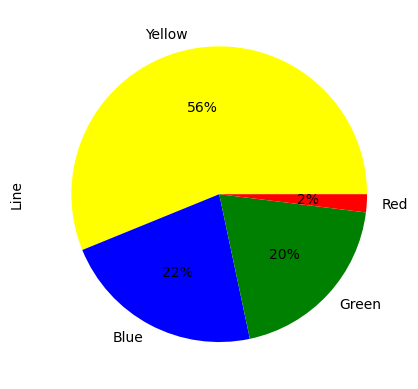

In [44]:
percent=fails_f['Line'].value_counts()
percent.plot(kind='pie',autopct='%1.0f%%',colors=['yellow','blue','green','red']) 
#plot a pie chart with labels and colours matching the production lines

Below shows the type of fails seen for each line. It can be seen that all lines have significant fails for appearance. The yellow line also has significant fails for performance.

<AxesSubplot:xlabel='Line'>

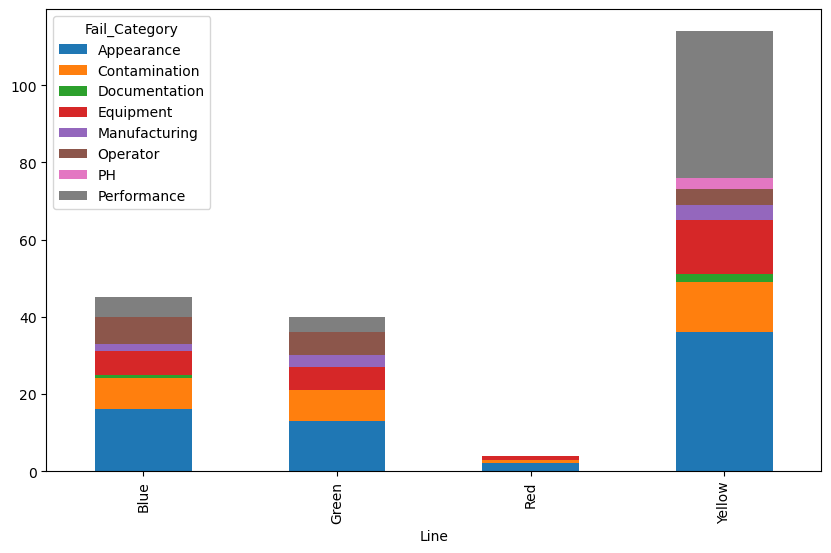

In [45]:
pd.crosstab(fails_f['Line'],fails_f['Fail_Category']).plot.bar(stacked=True, figsize=(10,6))

In [46]:
fails_f.Product_Code.value_counts(normalize=True).mul(100).round(1).nlargest(10).astype(str) + '%' 
#Looking at the top 10 fails by product code, PO1258E accounts for almost 5% of all fails

YW8767A    4.4%
BR0350R    3.4%
DH8853O    2.9%
TB0848U    2.9%
OJ1514U    2.5%
GK1048Y    2.5%
UC3962B    2.5%
AD9183H    2.5%
NW9144Z    2.0%
VJ8305O    2.0%
Name: Product_Code, dtype: object

This shows that YW8767A most often fails on performance for no inhibition.

In [47]:
fails_f.loc[fails_f['Product_Code']=='YW8767A',["Product_Code","Fail_Category","Fail_Sub_Category"]]

,Product_Code,Fail_Category,Fail_Sub_Category
Batch_no,,,
1794231,YW8767A,Performance,No inhibition
7056737,YW8767A,Performance,No Growth
7143440,YW8767A,Performance,No Growth
1253702,YW8767A,Performance,No inhibition
8547691,YW8767A,Performance,No inhibition
9829620,YW8767A,Performance,No inhibition
9384024,YW8767A,Appearance,Bits
8613227,YW8767A,Performance,No inhibition
3149140,YW8767A,Performance,No inhibition


In [48]:
fails_f.loc[fails_f['Product_Code']=='YW8767A',["Product_Code","Fail_Category","Fail_Sub_Category"]].groupby(['Fail_Category','Fail_Sub_Category']).count()

Product_Code
Fail_Category Fail_Sub_Category              
Appearance    Bits                          1
Performance   No Growth                     2
              No inhibition                 6

In [49]:
fails_f.Vessel.value_counts(normalize=True).mul(100).round(1).nlargest(10).astype(str) + '%' 
#Looking at the top 10 failures by vessel, vessels 1265 and 341 are the top two vessels for failure.

1265       9.5%
341        8.9%
925/926    7.1%
1107       6.5%
1612       6.5%
1076       5.9%
1226       5.3%
1105       4.1%
923        4.1%
397        4.1%
Name: Vessel, dtype: object

<AxesSubplot:title={'center':'Fails by Vessel'}, xlabel='Vessel', ylabel='Count'>

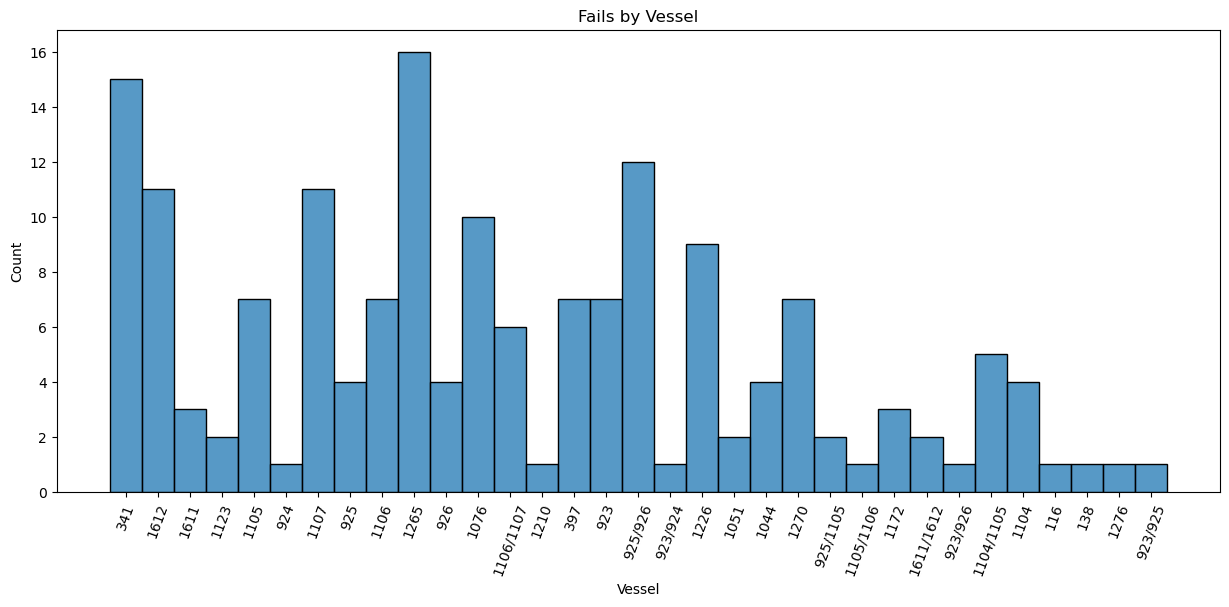

In [50]:
plt.figure(figsize=(15,6))
plt.title("Fails by Vessel")
plt.xticks(rotation=70)
sns.histplot(data=fails_f['Vessel'],kde=False, palette='blues')
#Showing all vessels on a histogram

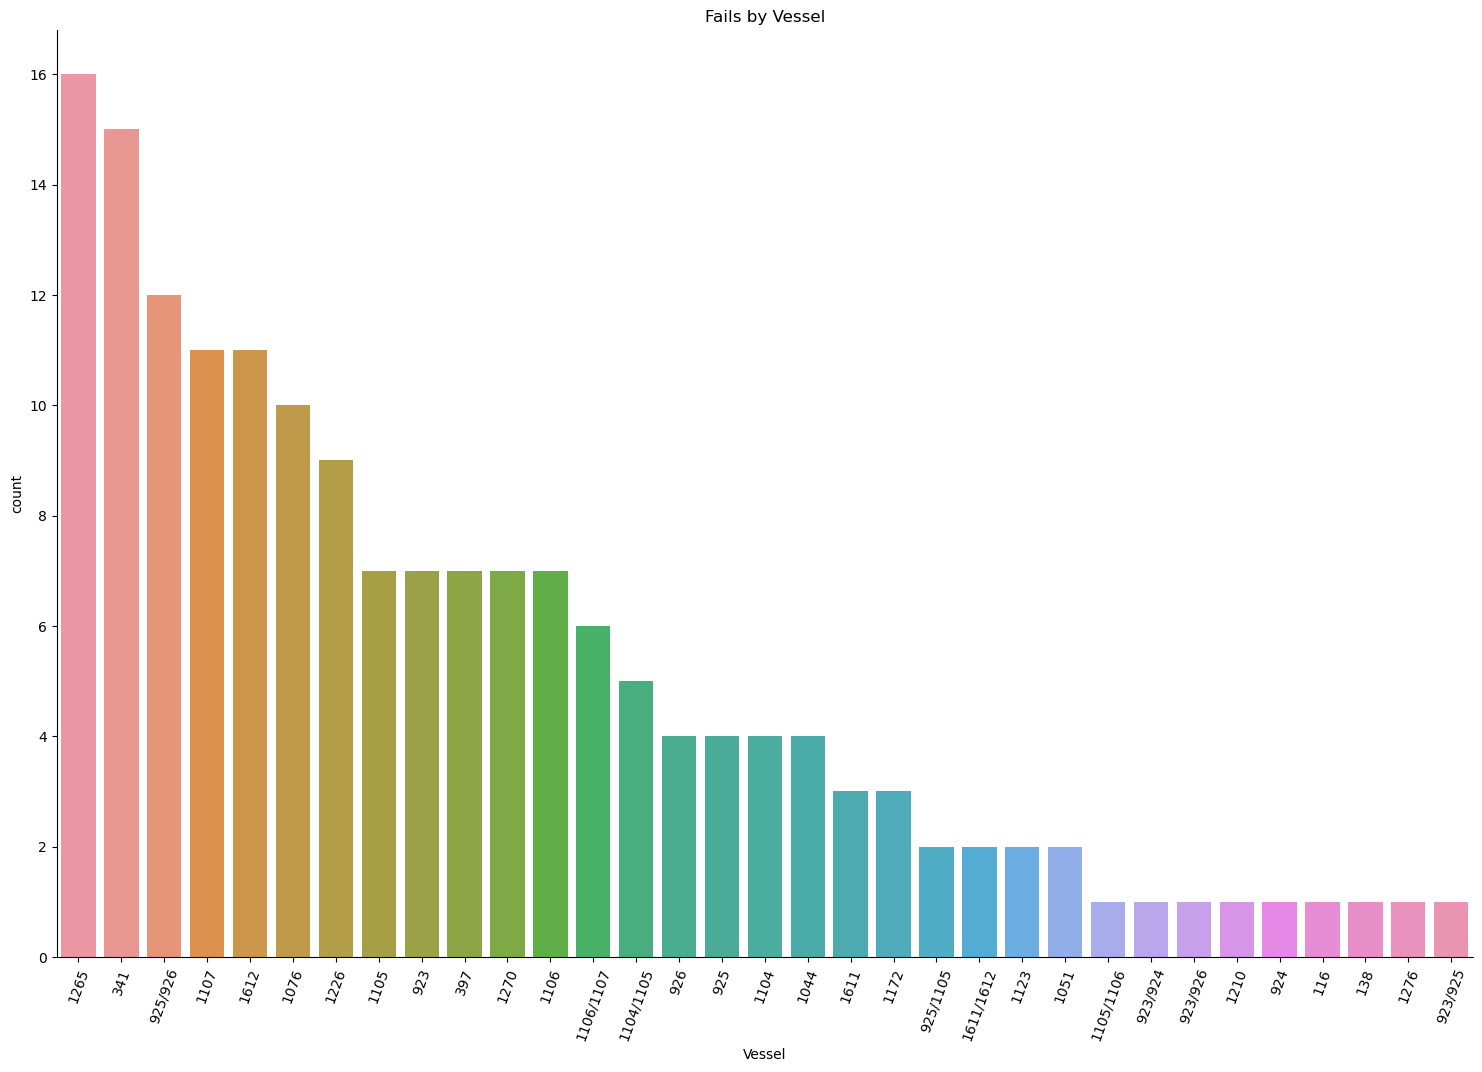

In [51]:
chart=sns.catplot(data=fails_f, x='Vessel',kind='count', ci=None, height=10, aspect=1.5, order=fails_f['Vessel'].value_counts().index).set(title='Fails by Vessel')
chart.set_xticklabels(rotation=70) #catplot ordered to better show the worst offending vessels

As below it can be seen that the top 10 vessels for failures mostly seem to be used on one line in particular, i.e. Vessel 1265 has 9 fails on the yellow line, but only 5 on the blue and 1 on the green and red.

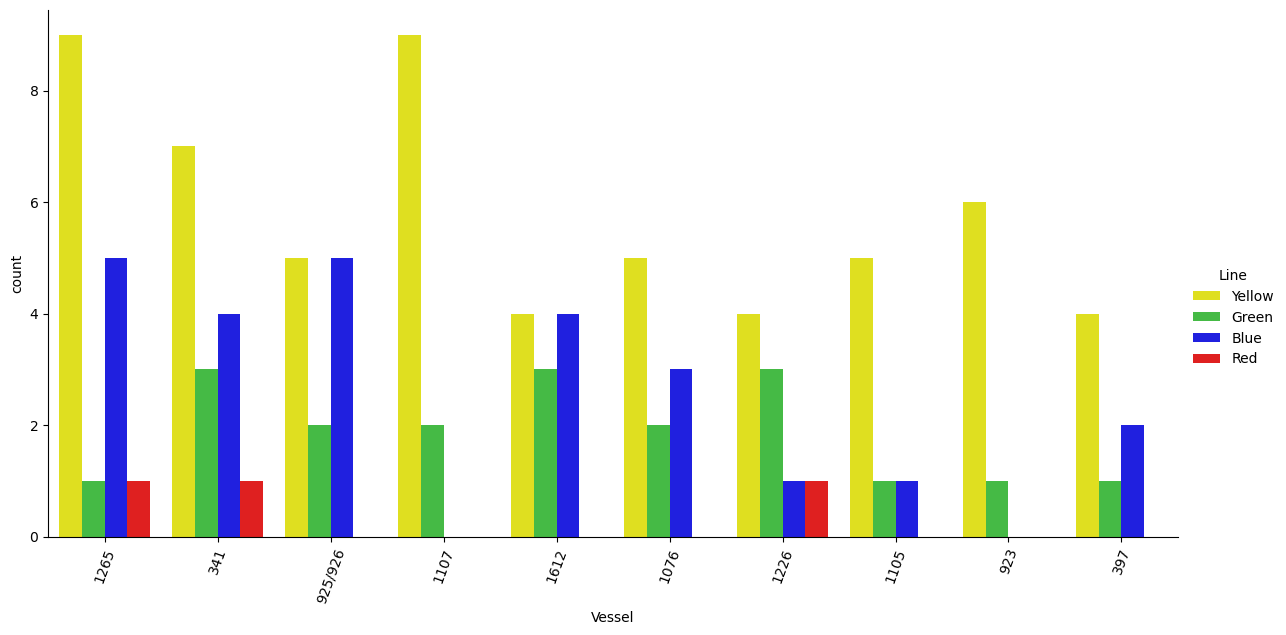

In [67]:
my_pal ={'Yellow':'yellow', 'Blue':'blue','Green':'limegreen','Red':'red'}
chart=sns.catplot(data=fails_f, x='Vessel',kind='count', ci=None, height=6, aspect=2, hue="Line", palette=my_pal,order=fails_f['Vessel'].value_counts().nlargest(10).index)
chart.set_xticklabels(rotation=70)

The data in the fails dataset covers the end of 2023 and the beginning of 2024.
The below graph shows that in the end of 2022, fails were higher across the board. Possibly due to the increased manufacture towards the end of the year which the company does as a ramp-up to ensure we have enough stock to get us through the Christmas period where production numbers are lower.

<AxesSubplot:xlabel='Manufacture_Week'>

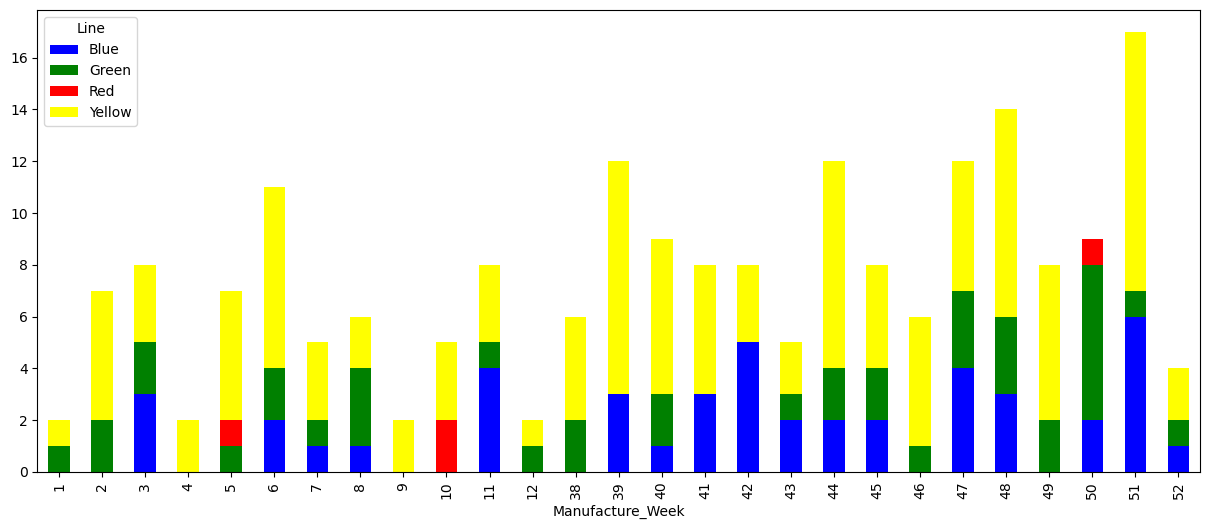

In [53]:
pd.crosstab(fails_f['Manufacture_Week'],fails_f['Line']).plot.bar(stacked=True, figsize=(15,6),color=['blue','green','red','yellow'])

The below plot shows that whilst Appearance and Performance fails are the most common, within the sub categories of fail there aren't any that stand out as being the major cause.

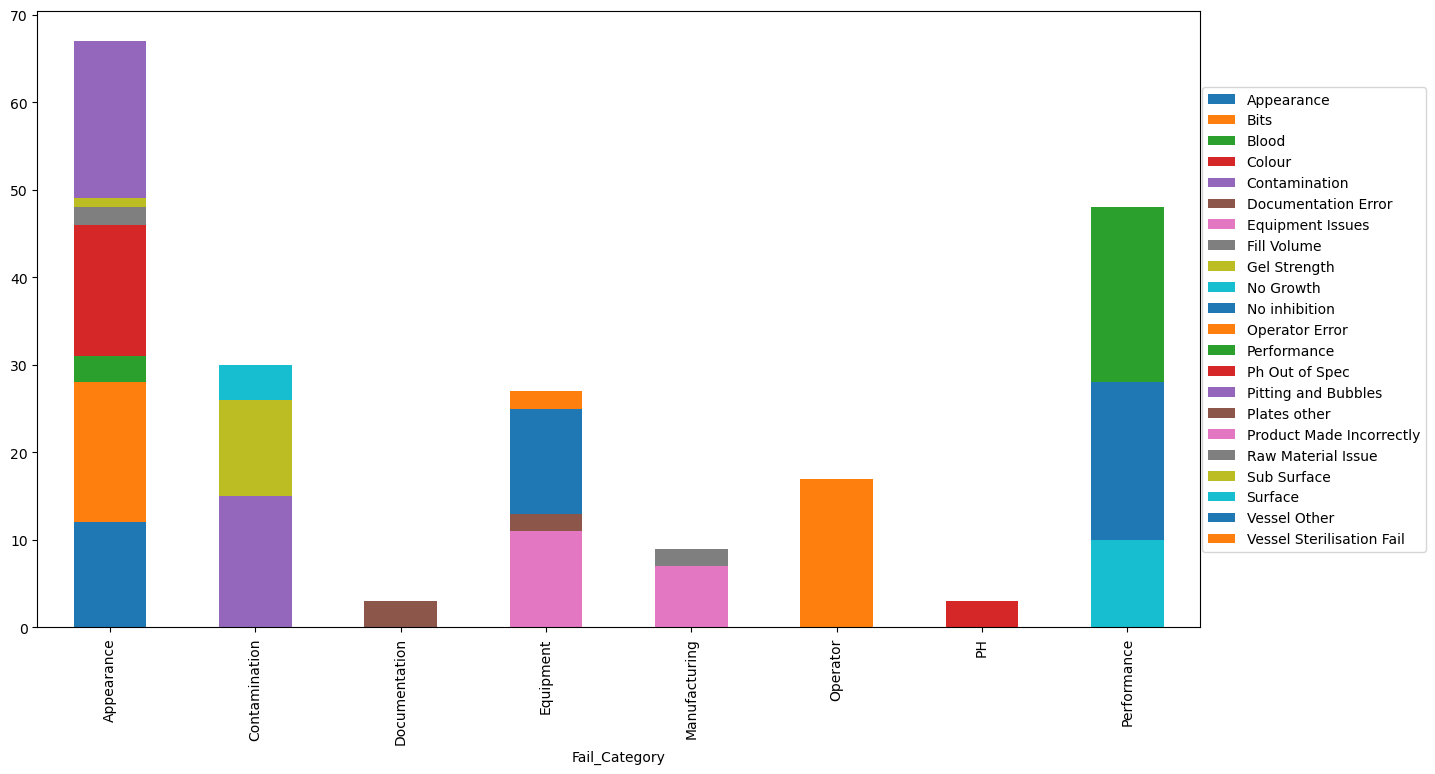

In [54]:
ct = pd.crosstab(fails_f['Fail_Category'],fails_f['Fail_Sub_Category']) #using cross tab to compare the fail categories and break down to sub-categories
ct.plot(kind='bar', stacked=True, figsize=(15,8)) #plot a stacked bar chart
plt.legend(loc='center right',bbox_to_anchor=(1.2, 0.5))

In [55]:
categories = fails_f.loc[:, ["Product_Code","Fail_Category","Fail_Sub_Category"]].groupby(['Fail_Category','Fail_Sub_Category']).count()
categories

Product_Code
Fail_Category Fail_Sub_Category                      
Appearance    Appearance                           12
              Bits                                 16
              Blood                                 3
              Colour                               15
              Fill Volume                           2
              Gel Strength                          1
              Pitting and Bubbles                  18
Contamination Contamination                        15
              Sub Surface                          11
              Surface                               4
Documentation Documentation Error                   3
Equipment     Equipment Issues                     11
              Plates other                          2
              Vessel Other                         12
              Vessel Sterilisation Fail             2
Manufacturing Product Made Incorrectly              7
              Raw Material Issue                    2
Operator      Operator Error                       17
PH            Ph Out of Spec                        3
Performance   No Growth                            10
              No inhibition                        18
              Performance                          20

### Scrap Dataset Analysis

In [56]:
scrap_f.head(3)

,Product_Code,Batch_no,Manufacture_Date,Theoretical_Yield,GR_Qty,Total_input_ml,QC_Qty_ml,Theoretical_Yield_ml,GR_Qty_ml,Waste_ml,Percent_waste_loss,Waste_Total_Cost
0,JM1441K,6885243,5/01/2024,"1,865.13","1,712.00","337,163.49","1,440.00","335,723.58",308160,"27,563.58",8.20,429.99
1,JM1441K,3819574,5/01/2024,"1,865.13","1,695.00","337,163.49","1,440.00","335,723.58",305100,"30,623.58",9.10,477.73
2,GU2783J,3867703,5/01/2024,"1,080.19",998.00,"196,413.60","1,980.00","194,433.66",179640,"14,793.66",7.60,218.95


In [57]:
scrap_f.shape

(2169, 12)

The scrap dataset covers every batch poured in 2024, whether it failed or not. It states the theoretical yield and the input in ml, quantity taken for quality samples and what was received, calculating the amount of waste for each batch.

In [58]:
freq = scrap_f.Product_Code.value_counts() #frequency count of each product
perc = (freq / freq.sum())*100 #percentage frequency of each product
avg_waste = scrap_f.groupby(['Product_Code'])['Percent_waste_loss'].mean() #average waste for each product
scrap_freq = pd.concat([freq,perc,avg_waste], axis=1, keys=['count', 'percentage', 'average_waste']) #combine into a new df
scrap_freq

,count,percentage,average_waste
YW6837P,104,4.79,20.05
PT4146F,94,4.33,7.75
JQ7006J,84,3.87,9.10
JM1441K,81,3.73,13.45
BP3944H,72,3.32,6.74
...,...,...,...
CP7578K,2,0.09,13.80
CX5753T,2,0.09,25.65
BG2424L,2,0.09,20.25
FV8183W,2,0.09,62.65


In [59]:
scrap_f['Product_Code'].value_counts().nlargest(15) #15 highest frequency products

YW6837P    104
PT4146F     94
JQ7006J     84
JM1441K     81
BP3944H     72
BS9035V     53
RD5975P     47
SX0386C     44
ON0348A     43
AB1535W     39
NI2398W     31
JW3722P     31
JU8568U     29
ER5186B     28
CI3726D     27
Name: Product_Code, dtype: int64

<AxesSubplot:title={'center':'Top 15 Products'}, xlabel='Product_Code', ylabel='Percent_waste_loss'>

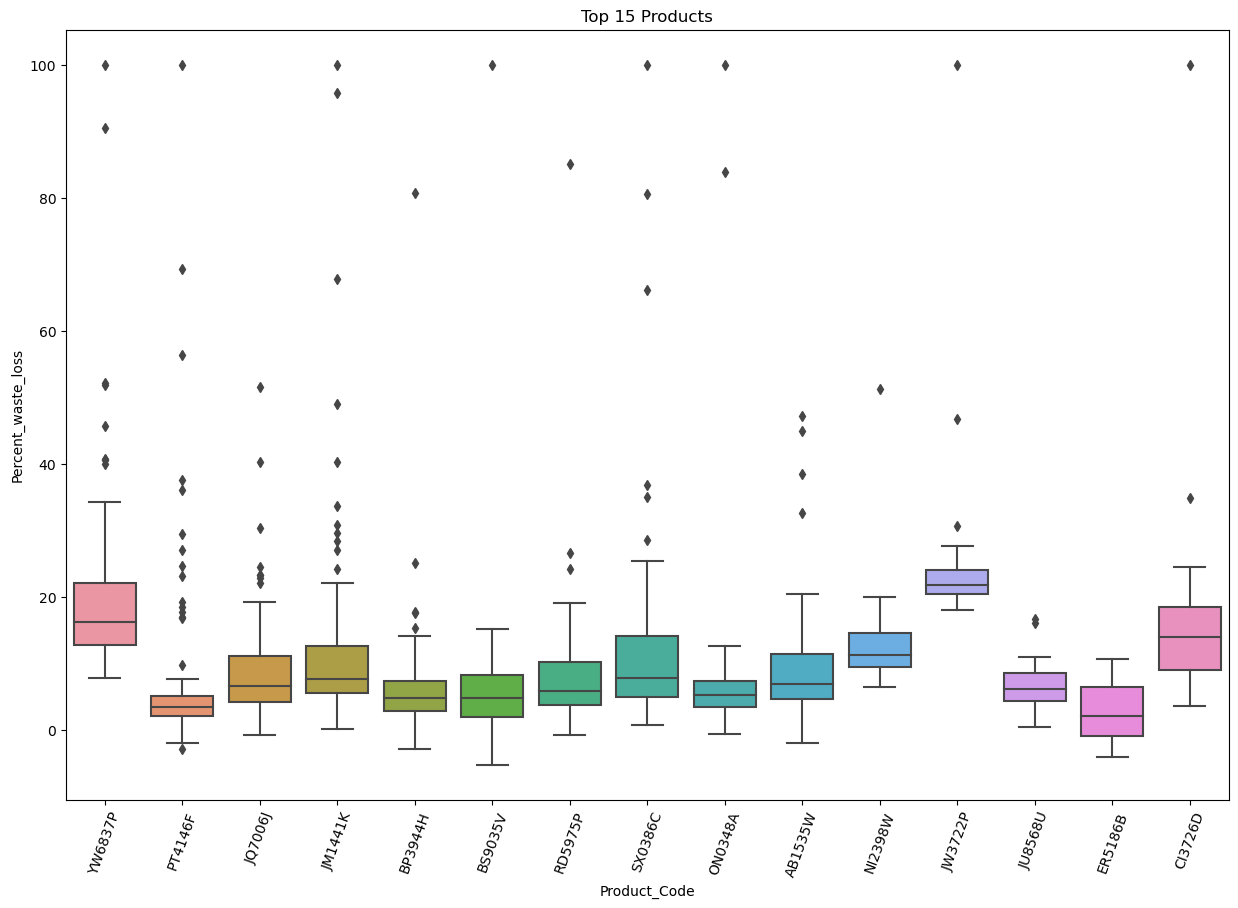

In [60]:
#create a box plot for the top 15 products to see waste distribution
plt.figure(figsize=(15,10))
plt.title("Top 15 Products")
plt.xticks(rotation=70)
sns.boxplot(x='Product_Code', y='Percent_waste_loss',data=scrap_f, order=scrap_f['Product_Code'].value_counts().nlargest(15).index)

<AxesSubplot:title={'center':'Top 15 Products for waste loss'}, xlabel='Product_Code', ylabel='Percent_waste_loss'>

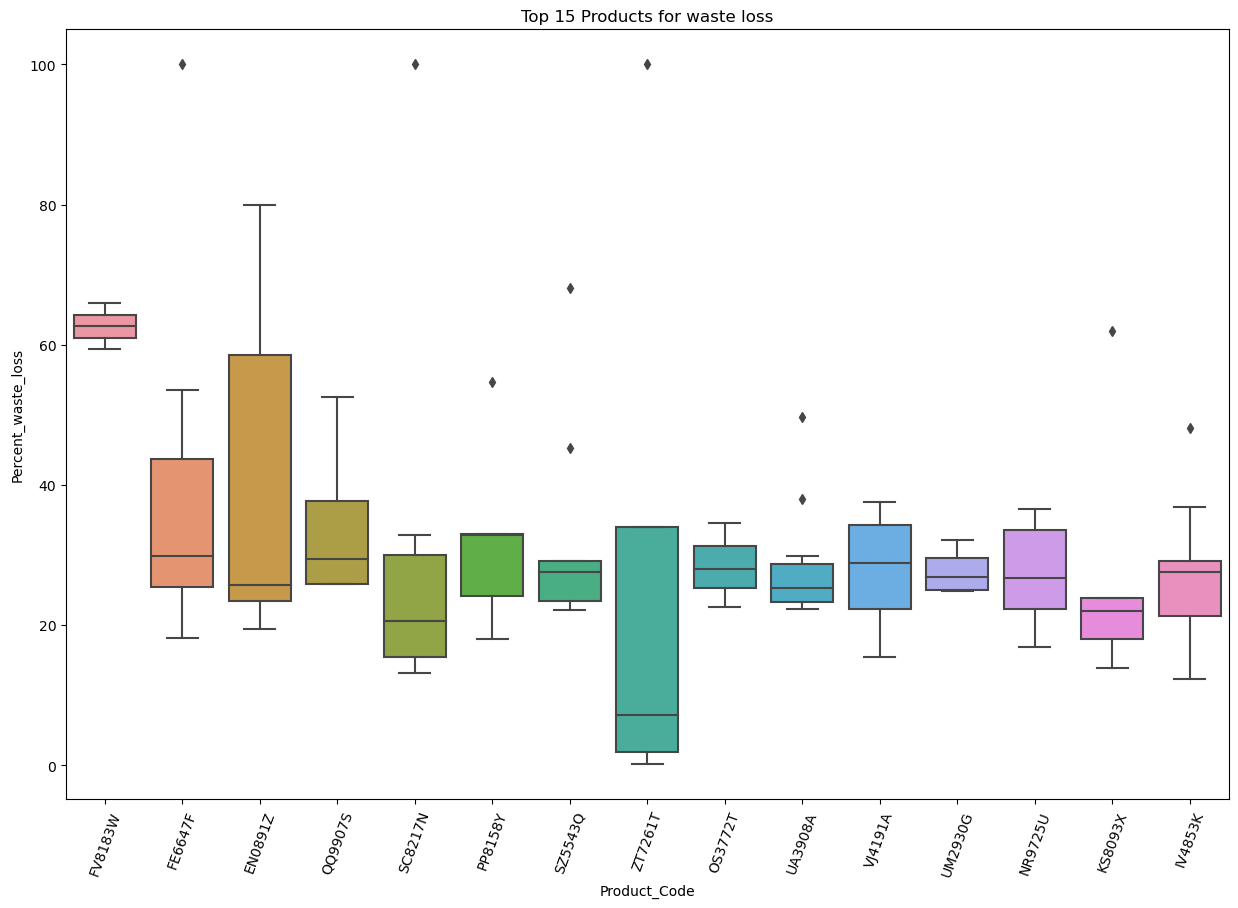

In [61]:
#plot the distribution of the top products for waste loss
plt.figure(figsize=(15,10))
plt.title("Top 15 Products for waste loss")
plt.xticks(rotation=70)
sns.boxplot(x='Product_Code', y='Percent_waste_loss',data=scrap_f, order=scrap_f.groupby(['Product_Code'])['Percent_waste_loss'].mean().nlargest(15).index)

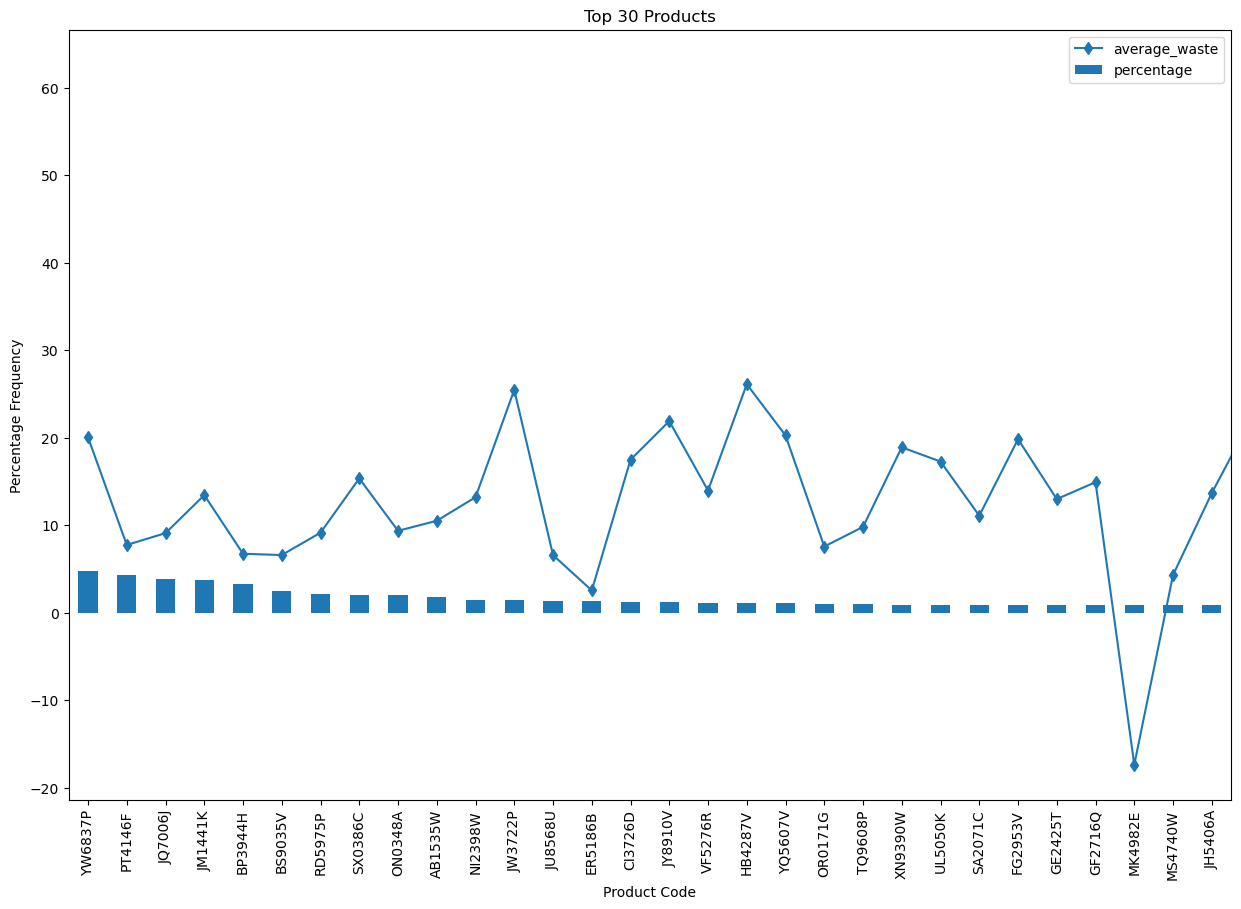

In [62]:
#plot the product percentage frequency as a bar chart with the average scrap on top as a line, top 30 products
fig, ax1 = plt.subplots(figsize=(15, 10))
plt.title("Top 30 Products")
scrap_freq['percentage'].nlargest(30).plot(kind='bar',xlabel='Product Code', ylabel='Percentage Frequency')
scrap_freq['average_waste'].plot(kind='line', marker='d')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [63]:
scrap_freq.index.name='Product_Code'

In [64]:
scrap_freq["rank"] = scrap_freq['count'].rank(ascending=False, method='min')
#assign a rank to the count to identify the top products by number of batches

In [65]:
scrap_freq.sort_values(by='average_waste', ascending=False).head(15) # shows that whilst the top products for scrap are very high, they don't account for a large proportion of batches in a 3 month period.

,count,percentage,average_waste,rank
Product_Code,,,,
FV8183W,2,0.09,62.65,164.00
FE6647F,8,0.37,40.20,79.00
EN0891Z,9,0.41,38.43,67.00
QQ9907S,5,0.23,34.28,121.00
SC8217N,6,0.28,33.55,104.00
PP8158Y,5,0.23,32.54,121.00
SZ5543Q,9,0.41,32.37,67.00
ZT7261T,4,0.18,28.60,136.00
OS3772T,3,0.14,28.37,153.00


In [68]:
scrap_freq.loc[['MK4982E']] #negative average waste which is not a positive

,count,percentage,average_waste,rank
Product_Code,,,,
MK4982E,18,0.83,-17.37,28.00


In [69]:
scrap_freq['scaled_data'] = ((scrap_freq['percentage']/100) * (scrap_freq['average_waste']/100))*100
scrap_freq

,count,percentage,average_waste,rank,scaled_data
Product_Code,,,,,
YW6837P,104,4.79,20.05,1.00,0.96
PT4146F,94,4.33,7.75,2.00,0.34
JQ7006J,84,3.87,9.10,3.00,0.35
JM1441K,81,3.73,13.45,4.00,0.50
BP3944H,72,3.32,6.74,5.00,0.22
...,...,...,...,...,...
CP7578K,2,0.09,13.80,164.00,0.01
CX5753T,2,0.09,25.65,164.00,0.02
BG2424L,2,0.09,20.25,164.00,0.02


In [70]:
scrap_freq.sort_values(by='scaled_data', ascending=False).head(15)

,count,percentage,average_waste,rank,scaled_data
Product_Code,,,,,
YW6837P,104,4.79,20.05,1.00,0.96
JM1441K,81,3.73,13.45,4.00,0.50
JW3722P,31,1.43,25.48,11.00,0.36
JQ7006J,84,3.87,9.10,3.00,0.35
PT4146F,94,4.33,7.75,2.00,0.34
SX0386C,44,2.03,15.36,8.00,0.31
HB4287V,23,1.06,26.13,18.00,0.28
JY8910V,26,1.20,21.91,16.00,0.26
BP3944H,72,3.32,6.74,5.00,0.22


In [71]:
scrap_freq["rank_scaled"] = scrap_freq['scaled_data'].rank(ascending=False, method='min')

In [72]:
scrap_freq.head(5)

,count,percentage,average_waste,rank,scaled_data,rank_scaled
Product_Code,,,,,,
YW6837P,104,4.79,20.05,1.00,0.96,1.00
PT4146F,94,4.33,7.75,2.00,0.34,5.00
JQ7006J,84,3.87,9.10,3.00,0.35,4.00
JM1441K,81,3.73,13.45,4.00,0.50,2.00
BP3944H,72,3.32,6.74,5.00,0.22,9.00


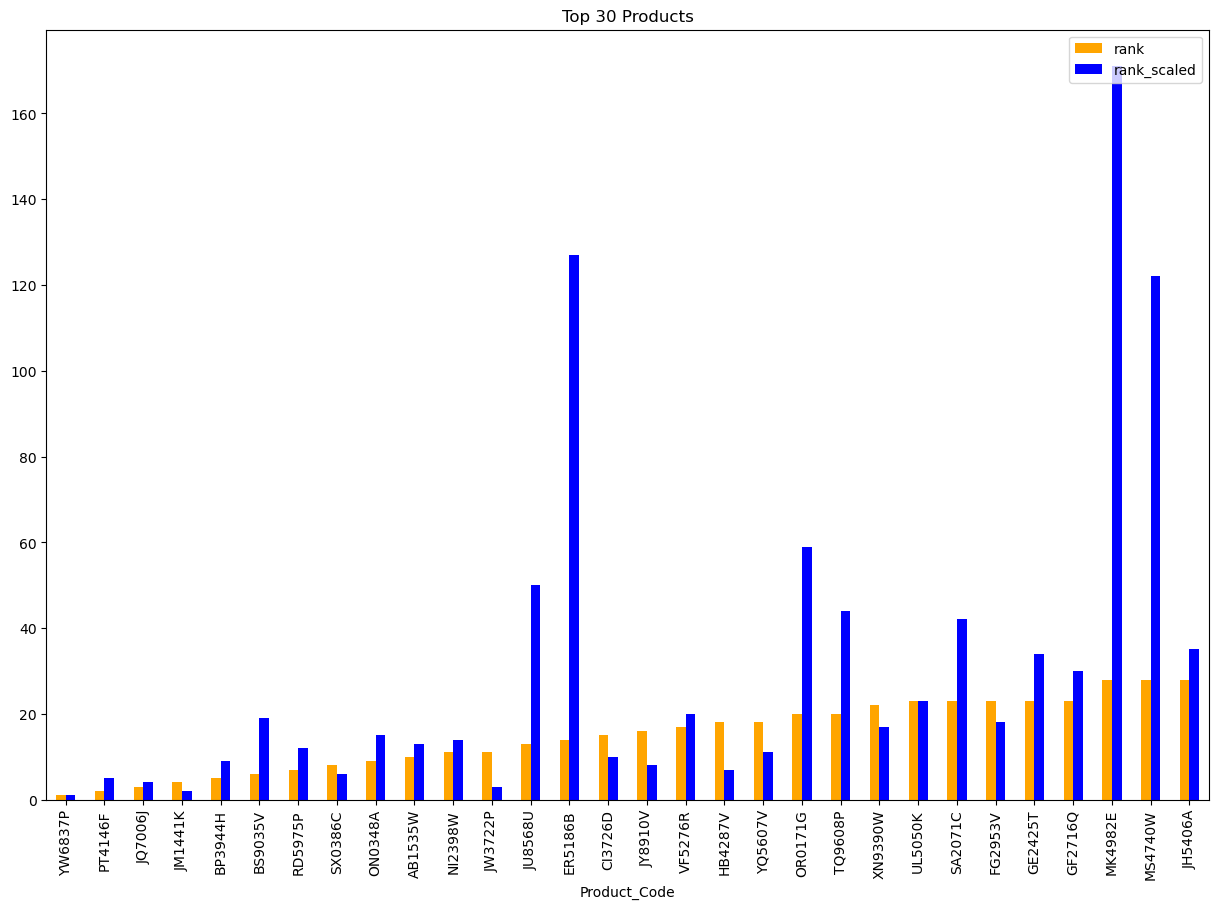

In [73]:
top_30=scrap_freq.head(30)
top_30.plot( y=['rank','rank_scaled'], kind='bar',figsize=(15, 10),color=('orange','blue'))
plt.title("Top 30 Products")
plt.xticks(rotation='vertical')
plt.legend(['rank', 'rank_scaled'], loc='upper right')
plt.show()

Scaling the data and sorting for the highest scaled values shows that when the frequency of the product being poured is taken in conjunction with the scrap produced then there are some products worth looking at that are outside of the top 6 runners which currently get the most focus. For example, JW3722P, as seen below, was 11th in rank when looking at product frequency, but when taking into account fails, moved up to 3rd. 

In [74]:
top_30.loc[['JW3722P']]

,count,percentage,average_waste,rank,scaled_data,rank_scaled
Product_Code,,,,,,
JW3722P,31,1.43,25.48,11.00,0.36,3.00


In [76]:
scrap_freq.loc[['GE2425T']]

,count,percentage,average_waste,rank,scaled_data,rank_scaled
Product_Code,,,,,,
GE2425T,19,0.88,12.99,23.00,0.11,34.00


In [77]:
scrap_f.loc[scrap_f['Product_Code'] == 'JW3722P']

,Product_Code,Batch_no,Manufacture_Date,Theoretical_Yield,GR_Qty,Total_input_ml,QC_Qty_ml,Theoretical_Yield_ml,GR_Qty_ml,Waste_ml,Percent_waste_loss,Waste_Total_Cost
181,JW3722P,6304111,10/01/2024,291.45,232.00,"52,550.75",90.00,"52,460.82",41760,"10,700.82",20.40,303.90
269,JW3722P,5990377,12/01/2024,291.45,233.00,"52,550.75",90.00,"52,460.82",41940,"10,520.82",20.10,298.79
344,JW3722P,1950579,14/01/2024,291.45,0.00,"52,550.75",90.00,"52,460.82",0,"52,460.82",100.00,"1,489.89"
435,JW3722P,7389131,18/01/2024,291.45,236.00,"52,550.75",90.00,"52,460.82",42480,"9,980.82",19.00,283.46
590,JW3722P,5474268,24/01/2024,291.45,229.00,"52,550.75",90.00,"52,460.82",41220,"11,240.82",21.40,319.24
591,JW3722P,4243236,24/01/2024,291.45,225.00,"52,550.75",90.00,"52,460.82",40500,"11,960.82",22.80,339.69
634,JW3722P,5631324,25/01/2024,291.45,220.00,"52,550.75",90.00,"52,460.82",39600,"12,860.82",24.50,365.25
635,JW3722P,6776047,25/01/2024,299.79,235.00,"52,550.75",87.50,"52,463.25",41125,"11,338.25",21.60,331.08
801,JW3722P,8766040,32/01/2024,291.45,224.00,"52,550.75",90.00,"52,460.82",40320,"12,140.82",23.10,344.80
842,JW3722P,2856318,2/02/2024,291.45,202.00,"52,550.75",90.00,"52,460.82",36360,"16,100.82",30.70,457.26


### Control chart

In [78]:
import numpy
control_data = scrap_f['Percent_waste_loss'].head(2168)
array = numpy.array(control_data).reshape(1084,2)

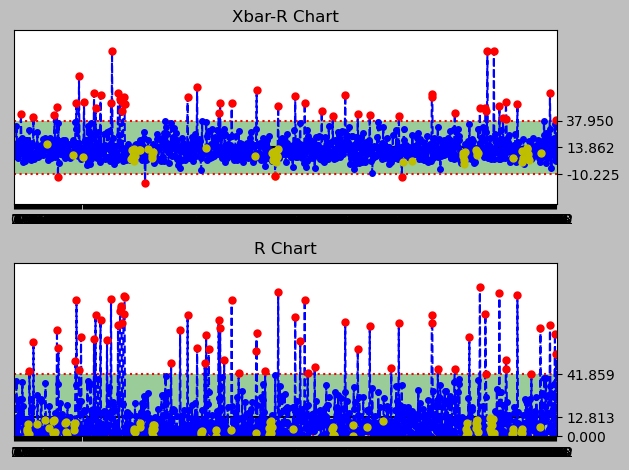

<pyspc: (145911828408)>


In [79]:
from pyspc import *
a = spc(array) + xbar_rbar() + rbar() + rules()
print(a)

The xbar-mR chart has previously been used onsite to try and identify where our upper limit for scrap is and to assess whether the process is out of control and when an investigation is needed into a fail. A few years ago we set the automatic limit for investigation to anything above a 40% loss. Based on the upper control limit calculated looking at the 2023 data 40% is still a realistic threshold based on the data. Although it could potentially be set to 35% to aid efforts to bring the process under control. As can be seen, there have been a lot of batches outside of the UCL in 2023, indicating the process is not in control.

## Conclusions

JW3722P is a product which has consistently come up during the investigation as being a major cause of fails and high scrap. It was also identified as having a high impact if the average scrap and fail rate were to be lowered.

The ranking system should be used to identify products which will have the most impact on overall scrap rates as there are several products identified which are not in the ‘top 6’  monitored products onsite. For example, YW6837P is not in the top 6, yet is the most frequently poured product and when scaled is identified as still being the number one product to have the most impact on scrap as it has an average scrap of 20%.

Whilst the site is investigating fails at the right limit using control charts, it is not targeting the highest impact products. 